In [2]:
from preprocessing import make_dataframes
from PIL import Image
import config
import utils

In [1]:
import torch
import torch.nn as nn

import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import data_loader
import metrics
import config
from torch.utils.data import DataLoader
from tqdm import tqdm

# LeNet model for RGB images
class LeNet(nn.Module):
    def __init__(self, num_classes=2):
        super(LeNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1),
            nn.Dropout2d(0.2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=5, stride=1),
            nn.Dropout2d(0.2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=5, stride=1),
            nn.Dropout2d(0.2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=5, stride=1),
            nn.Dropout2d(0.2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(2048, 120),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(84, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = nn.Flatten()(x)
        x = self.classifier(x)
        return x

# Training loop
def train(model, criterion, optimizer, train_loader):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader):
        images, labels = images.to(config.DEVICE), labels.to(config.DEVICE)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    return running_loss / len(train_loader.dataset)

# Testing loop
def test(model, criterion, test_loader):
    model.eval()
    running_loss = 0.0
    true_labels = []
    pred_labels = []
    with torch.no_grad():
        for images, labels in tqdm(test_loader):
            images, labels = images.to(config.DEVICE), labels.to(config.DEVICE)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(predicted.cpu().numpy())
    
    avg_loss = running_loss / len(test_loader.dataset)
    true_labels = torch.tensor(true_labels)
    pred_labels = torch.tensor(pred_labels)
    acc = metrics.accuracy(true_labels, pred_labels)
    macro_f1 = metrics.f1_score(true_labels, pred_labels)

    return avg_loss, acc, macro_f1

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
num_epochs = 30
model = LeNet(num_classes=2).to(config.DEVICE)
class_weights = torch.tensor([1.0, 3500/700]).to(config.DEVICE)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.0005)
tr_loader , val_loader , test_loader = data_loader.create_dataloader(None,None,None)
for epoch in range(num_epochs):
    train_loss = train(model=model,criterion=criterion,optimizer=optimizer,train_loader=tr_loader)
    val_loss , acc , macro_f1 = test(model,criterion,val_loader)
    print(f"Epoch {epoch+1} | train_loss: {train_loss:.3f} | val_loss: {val_loss:.3f} | val_acc: {acc:.3f} | f1_score: {macro_f1:.3f}")

    

Tuberculosis             : 100%|█████████████████████████████████████████████████████████| 700/700 [00:00<00:00, 707814.08files/s]


100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Epoch 1 | train_loss: 0.480 | val_loss: 0.355 | val_acc: 0.938 | f1_score: 0.783


100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Epoch 2 | train_loss: 0.289 | val_loss: 0.305 | val_acc: 0.914 | f1_score: 0.763


100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Epoch 3 | train_loss: 0.244 | val_loss: 0.337 | val_acc: 0.955 | f1_score: 0.855


100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Epoch 4 | train_loss: 0.235 | val_loss: 0.285 | val_acc: 0.950 | f1_score: 0.851


100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Epoch 5 | train_loss: 0.212 | val_loss: 0.311 | val_acc: 0.967 | f1_score: 0.892


100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Epoch 6 | train_loss: 0.195 | val_loss: 0.312 | val_acc: 0.969 | f1_score: 0.899


100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Epoch 7 | train_loss: 0.216 | val_loss: 0.263 | val_acc: 0.971 | f1_score: 0.913


100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Epoch 8 | train_loss: 0.188 | val_loss: 0.263 | val_acc: 0.945 | f1_score: 0.850


100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Epoch 9 | train_loss: 0.160 | val_loss: 0.271 | val_acc: 0.962 | f1_score: 0.890


100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Epoch 10 | train_loss: 0.189 | val_loss: 0.333 | val_acc: 0.971 | f1_score: 0.914


100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Epoch 11 | train_loss: 0.182 | val_loss: 0.242 | val_acc: 0.962 | f1_score: 0.892


100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Epoch 12 | train_loss: 0.152 | val_loss: 0.238 | val_acc: 0.974 | f1_score: 0.922


100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Epoch 13 | train_loss: 0.149 | val_loss: 0.257 | val_acc: 0.964 | f1_score: 0.897


100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Epoch 14 | train_loss: 0.135 | val_loss: 0.222 | val_acc: 0.976 | f1_score: 0.930


100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


Epoch 15 | train_loss: 0.124 | val_loss: 0.380 | val_acc: 0.974 | f1_score: 0.917


100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Epoch 16 | train_loss: 0.143 | val_loss: 0.210 | val_acc: 0.950 | f1_score: 0.865


100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Epoch 17 | train_loss: 0.134 | val_loss: 0.221 | val_acc: 0.952 | f1_score: 0.868


100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Epoch 18 | train_loss: 0.139 | val_loss: 0.218 | val_acc: 0.952 | f1_score: 0.868


100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Epoch 19 | train_loss: 0.130 | val_loss: 0.239 | val_acc: 0.971 | f1_score: 0.917


100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Epoch 20 | train_loss: 0.125 | val_loss: 0.185 | val_acc: 0.983 | f1_score: 0.950


100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Epoch 21 | train_loss: 0.115 | val_loss: 0.203 | val_acc: 0.960 | f1_score: 0.886


100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Epoch 22 | train_loss: 0.101 | val_loss: 0.235 | val_acc: 0.962 | f1_score: 0.892


100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Epoch 23 | train_loss: 0.116 | val_loss: 0.214 | val_acc: 0.981 | f1_score: 0.943


100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Epoch 24 | train_loss: 0.105 | val_loss: 0.219 | val_acc: 0.974 | f1_score: 0.923


100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Epoch 25 | train_loss: 0.100 | val_loss: 0.255 | val_acc: 0.969 | f1_score: 0.912


100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Epoch 26 | train_loss: 0.102 | val_loss: 0.181 | val_acc: 0.962 | f1_score: 0.893


100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Epoch 27 | train_loss: 0.095 | val_loss: 0.203 | val_acc: 0.960 | f1_score: 0.887


100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


Epoch 28 | train_loss: 0.095 | val_loss: 0.248 | val_acc: 0.979 | f1_score: 0.936


100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Epoch 29 | train_loss: 0.085 | val_loss: 0.139 | val_acc: 0.981 | f1_score: 0.943


100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

Epoch 30 | train_loss: 0.088 | val_loss: 0.160 | val_acc: 0.981 | f1_score: 0.943


In [3]:
def predict_and_gather_uncorrected(model, data_loader):
    """
    Predict batches of data using the given model and gather incorrect predictions.

    Args:
        model (torch.nn.Module): The trained model.
        data_loader (torch.utils.data.DataLoader): The data loader containing the data to predict.
        config.DEVICE (str): The device to use for inference ('cuda' for GPU or 'cpu').

    Returns:
        list of tuples: A list containing tuples (image, true_label, predicted_label) for incorrect predictions.
    """
    model.eval()
    uncorrected_list = []

    with torch.no_grad():
        for images, true_labels in data_loader:
            images = images.to(config.DEVICE)
            true_labels = true_labels.to(config.DEVICE)

            outputs = model(images)
            _, predicted_labels = torch.max(outputs, 1)

            incorrect_mask = predicted_labels != true_labels
            for idx in range(len(images)):
                if incorrect_mask[idx]:
                    image = images[idx].cpu()  # Move the image to CPU for visualization if needed
                    true_label = true_labels[idx].item()
                    predicted_label = predicted_labels[idx].item()
                    uncorrected_list.append((image, true_label, predicted_label))

    return uncorrected_list

# Example usage:
# Assuming you have a trained model 'model', a data loader 'data_loader', and the config.DEVICE to use 'config.DEVICE' (e.g., 'cuda' or 'cpu').
uncorrected_list = predict_and_gather_uncorrected(model, test_loader)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

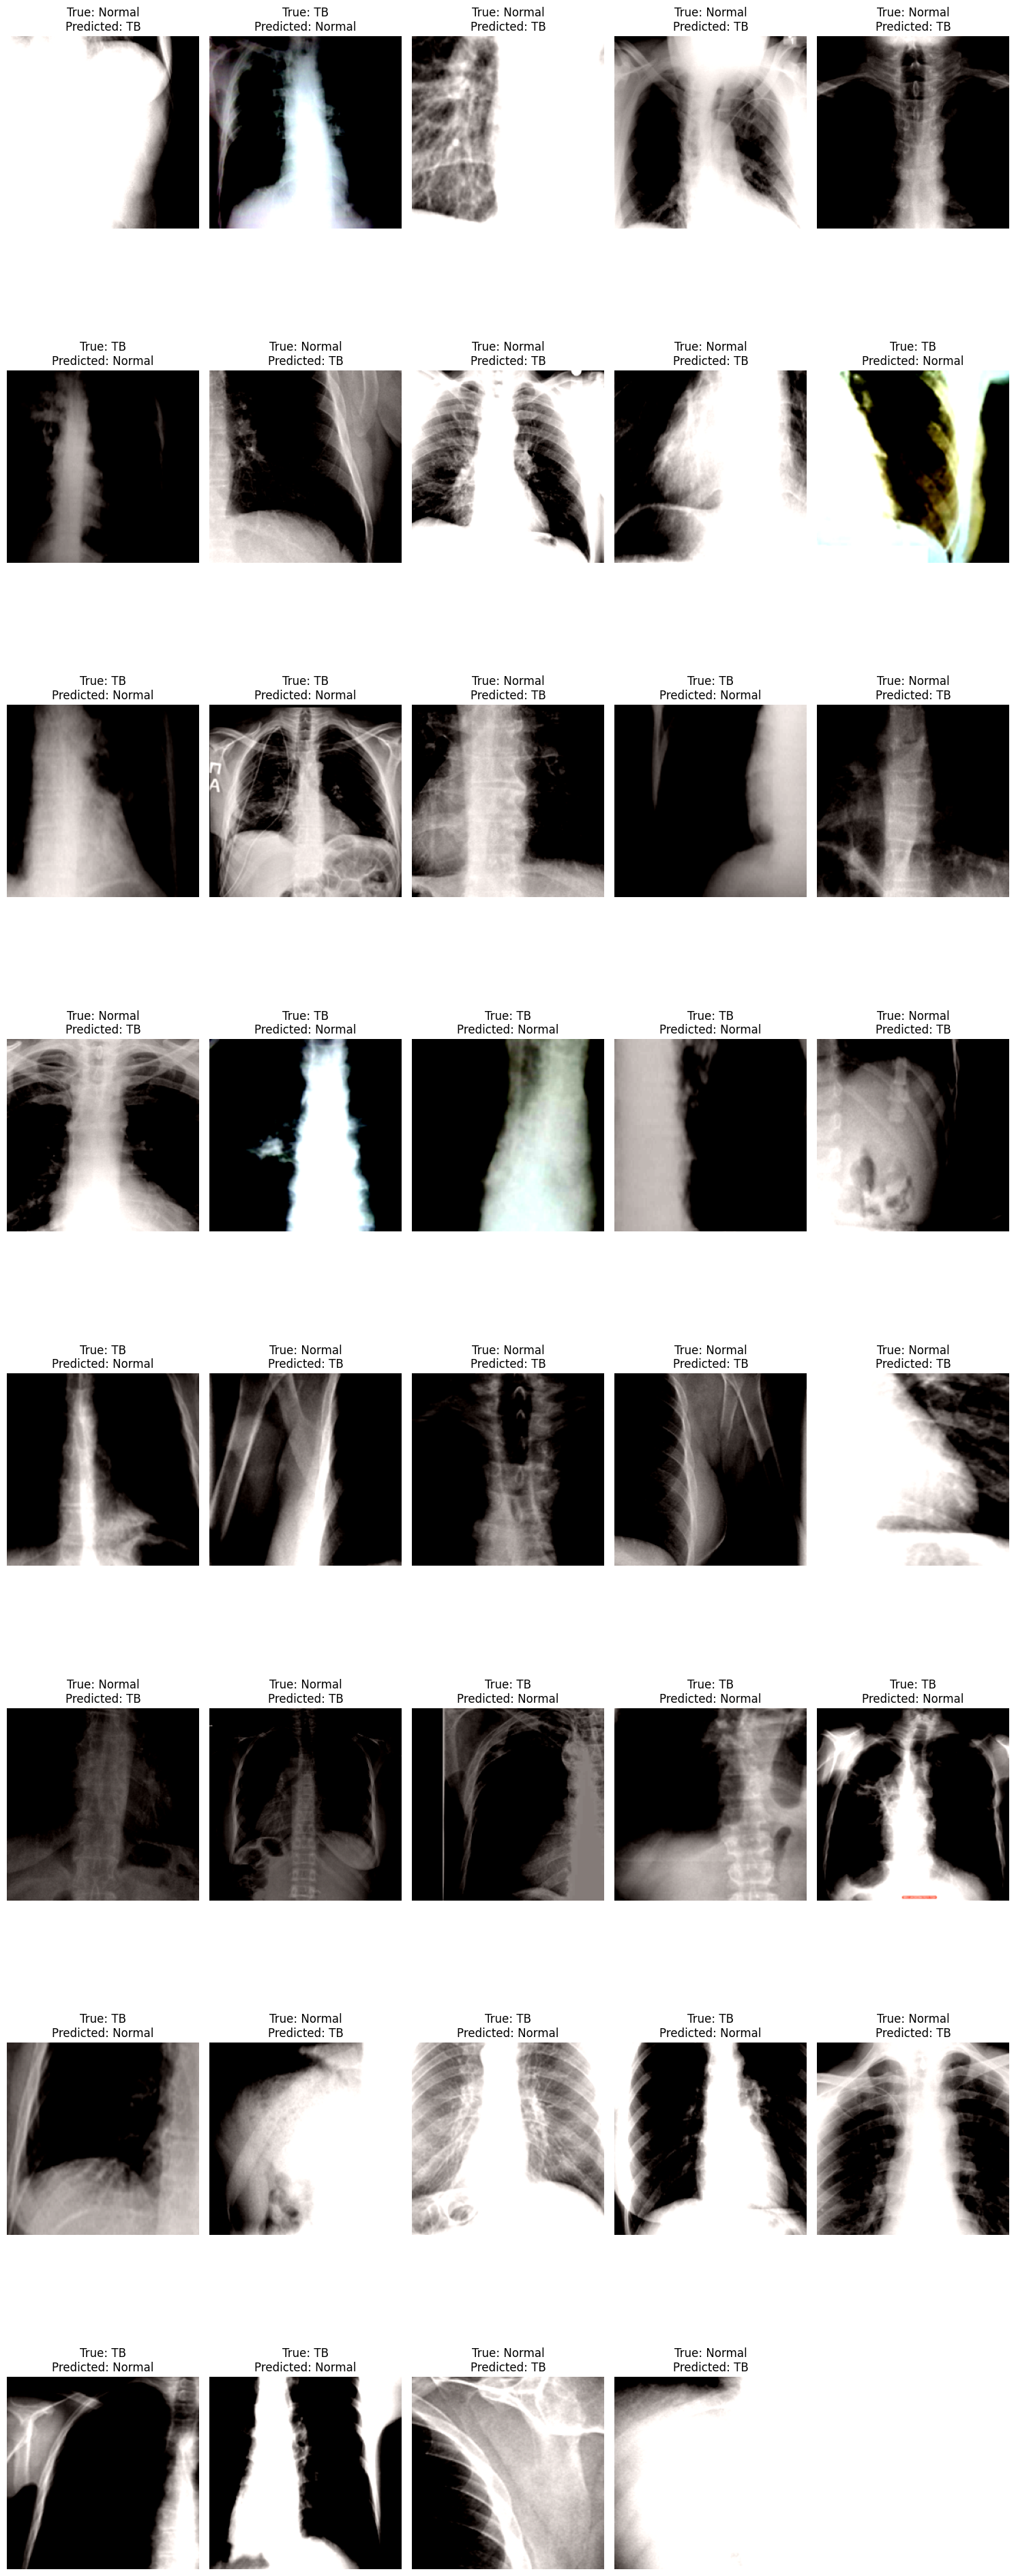

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_incorrect_predictions(uncorrected_list, class_labels):
    """
    Plot the images with their correct and predicted labels for incorrect predictions.

    Args:
        uncorrected_list (list of tuples): List containing tuples (image, true_label, predicted_label)
                                          for incorrect predictions.
        class_labels (dict): Dictionary mapping class indices to class labels.
    """
    num_images = len(uncorrected_list)
    num_rows = (num_images - 1) // 5 + 1
    num_cols = min(num_images, 5)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    for idx, (image, true_label, predicted_label) in enumerate(uncorrected_list):
        true_label = class_labels[true_label]
        predicted_label = class_labels[predicted_label]

        row_idx = idx // 5
        col_idx = idx % 5

        axes[row_idx, col_idx].imshow(image.permute(1, 2, 0))  # Move channels to the last dimension for visualization
        axes[row_idx, col_idx].axis('off')

        axes[row_idx, col_idx].set_title(f'True: {true_label}\nPredicted: {predicted_label}')

    for idx in range(num_images, num_rows * 5):
        row_idx = idx // 5
        col_idx = idx % 5
        fig.delaxes(axes[row_idx, col_idx])

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have 'uncorrected_list' as a list of tuples (image, true_label, predicted_label) from the previous function.
class_labels = {0: 'Normal', 1: 'TB'}  # Replace this with your actual class labels
plot_incorrect_predictions(uncorrected_list, class_labels)


In [14]:
import preprocessing
import pandas as pd
train_df, test_df, valid_df, class_count, average_height, average_weight, aspect_ratio = preprocessing.make_dataframes(config.DATASET_DIR)

concatenated_df = pd.concat([train_df,test_df,valid_df], ignore_index=True)

Tuberculosis             : 100%|█████████████████████████████████████████████████████████| 700/700 [00:00<00:00, 351071.72files/s]


In [19]:
import torch
import torchvision.transforms as transforms
from PIL import Image

def get_mean_std(data_df):
    """
    Calculate the mean and standard deviation of a list of RGB images specified in the DataFrame.

    Args:
        data_df (pd.DataFrame): The DataFrame containing 'filepaths' and 'labels' columns.

    Returns:
        tuple: A tuple containing the mean and standard deviation of the images as (mean, std).
    """
    transform = transforms.Compose([
        transforms.Lambda(lambda x: x.convert('RGB')),
        transforms.Resize((224, 224)),  # Resize images to a common size (optional)
        transforms.ToTensor()  # Convert images to PyTorch tensors
    ])

    images_list = []
    for filepath in tqdm(data_df['filepaths']):
        image = Image.open(filepath)
        image = transform(image)
        images_list.append(image)

    # Convert the list of images to a PyTorch tensor
    images_tensor = torch.stack(images_list)

    # Calculate the mean and standard deviation along each channel (R, G, and B)
    mean = torch.mean(images_tensor, dim=(0, 2, 3))
    std = torch.std(images_tensor, dim=(0, 2, 3))

    return mean, std

# Example usage:
# Assuming you have a DataFrame 'data_df' containing 'filepaths' and 'labels'.
# mean, std = calculate_mean_and_std_from_dataframe(data_df)
# print("Mean:", mean)
# print("Std:", std)
mean , std = get_mean_std(concatenated_df)

100%|██████████| 4200/4200 [00:39<00:00, 105.93it/s]


In [20]:
mean , std

(tensor([0.5013, 0.5097, 0.5125]), tensor([0.2587, 0.2588, 0.2601]))